In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

درخواست ۱۴:

در اینجا به دنبال بررسی تغییرات حاشیه سود فروش لپتاپ در طول زمان هستیم، اینکه نسبت سود به کل قیمت فروش یا درصد سود شرکت لوتک در برندهای مختلف لپتاپ و در ماه‌های مختلف چگونه تغییر کرده است. برای این موضوع نمودارهای مختلفی را در ادامه می‌آوریم:

In [149]:
all_data = pd.read_csv('sales_data.csv')

In [150]:
all_data[['year', 'month', 'day']] = all_data.Order_Date.str.split("-",expand=True)
all_data['year']=all_data['year'].astype('int')
all_data['month']=all_data['month'].astype('int')
all_data['day']=all_data['day'].astype('int')


all_data = all_data.loc[((all_data['month']<7) & (all_data['year']==1402)) | (all_data['year']<1402)]
all_data = all_data.loc[((all_data['month']>10) & (all_data['year']==1390)) | (all_data['year']>1390)]

In [151]:
profit_monthly = all_data.groupby(['year','month']).sum()[['Profit','Total_Price']].reset_index()
profit_monthly['profit_perc'] = profit_monthly['Profit']/profit_monthly['Total_Price']*100
profit_monthly.drop(columns=['Profit','Total_Price'],inplace=True)

profit_monthly['year'] = profit_monthly['year'].astype('str')
profit_monthly['month'] = profit_monthly['month'].astype('str')
profit_monthly['yearmonth'] = profit_monthly['year']+profit_monthly['month']

ابتدا بررسی می‌کنیم که میانگین درصد سود فروش شرکت در ماه‌های مختلف از سال ۱۳۹۰ تا نیمه ۱۴۰۲ چگونه تغییر پیدا کرده است. نمودار زیر نشان‌دهنده آن است که به صورت کلی درصد سود فروش لپتاپ برای شرکت علارغم نوسانات مختلف روندی افزایشی داشته است. از مقدار زیر ۹.۸ درصد در قبل از سال ۹۱ به حدود ۱۰ درصد در سال‌های اخیر رسیده است. 

([<matplotlib.axis.XTick at 0x138629d90>,
 [Text(0, 0, '139011'),
  Text(5, 0, '13914'),
  Text(10, 0, '13919'),
  Text(15, 0, '13922'),
  Text(20, 0, '13927'),
  Text(25, 0, '139212'),
  Text(30, 0, '13935'),
  Text(35, 0, '139310'),
  Text(40, 0, '13943'),
  Text(45, 0, '13948'),
  Text(50, 0, '13951'),
  Text(55, 0, '13956'),
  Text(60, 0, '139511'),
  Text(65, 0, '13964'),
  Text(70, 0, '13969'),
  Text(75, 0, '13972'),
  Text(80, 0, '13977'),
  Text(85, 0, '139712'),
  Text(90, 0, '13985'),
  Text(95, 0, '139810'),
  Text(100, 0, '13993'),
  Text(105, 0, '13998'),
  Text(110, 0, '14001'),
  Text(115, 0, '14006'),
  Text(120, 0, '140011'),
  Text(125, 0, '14014'),
  Text(130, 0, '14019'),
  Text(135, 0, '14022'),
  Text(140, 0, '')])

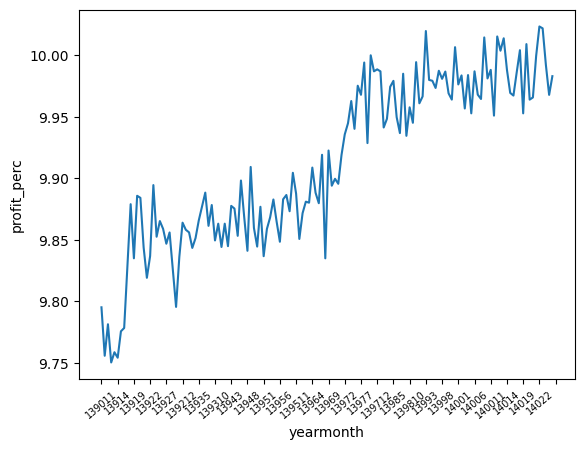

In [152]:
sns.lineplot(data=profit_monthly, x="yearmonth", y="profit_perc")
plt.xticks(range(0,142,5), rotation=40,fontsize=7)
#plt.xlim(0, 120)
#plt.locator_params(axis='x', nbins=20) 

اگر به صورت دقیق‌تر به نمودار نگاه کنیم دو جهش در این سود مشاهده می‌شود که یکی هنگام آغاز تحریم‌های سال ۱۳۹۱ و دیگری در زمان بازگشت تحریم‌ها در زمان ترامپ در سال ۱۳۹۷ است. این مشاهده در کنار روند صعودی که وجود دارد می‌تواند نشان‌ دهد که تحریم‌ها و محدودیت‌های خارجی باعث شده شرکت لوتک بتواند به صورت کلی درصد سود بیشتری روی لپتاپ‌ها به دست آورد که احتمالا به خاطر سخت‌تر شدن واردات و کاهش رقابت در بازار است. 

حال در نمودار زیر بررسی می‌کنیم که آیا میزان درصد سود دریافتی در ماه‌های مختلف سال متفاوت است؟ در واقع از داده ۱۲ ساله هر ماه استفاده می‌کنیم و بررسی می‌کنیم که رفتار خرید و فروش لپتاپ در ایام مختلف سال تفاوتی دارد یا خیر؟

In [153]:
profit_monthly2 = all_data.groupby(['month']).sum()[['Profit','Total_Price']].reset_index()
profit_monthly2['profit_perc'] = profit_monthly2['Profit']/profit_monthly2['Total_Price']*100
profit_monthly2.drop(columns=['Profit','Total_Price'],inplace=True)

([<matplotlib.axis.XTick at 0x13529a2d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

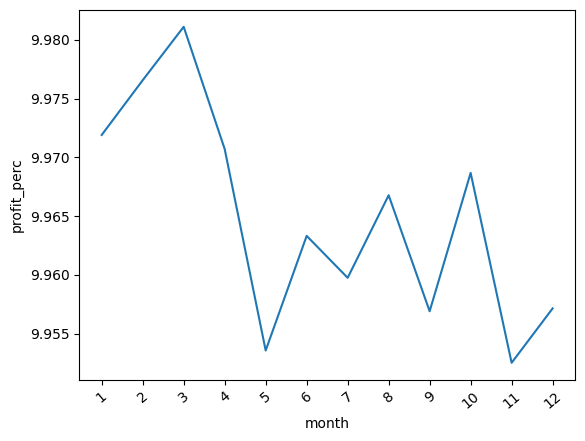

In [154]:
sns.lineplot(data=profit_monthly2, x="month", y="profit_perc")
plt.xticks(range(1,13,1),rotation=40)

در نمودار بعدی تفاوت سود هر برند را در ماه‌های مختلف سال بررسی می‌کنیم. با توجه به تفاوت ویژگی‌ها و قیمت‌های برندها و در نتیجه تفاوت علاقه‌مندان و مشتریان هر برند، ممکن است رفتار آن‌ها در ماه‌های مختلف دارای تفاوت باشد. پس شرکت باید با توجه به این واقعیت‌ها، طرح‌ها و تبلیغات خود برای هر برند را در زمان مناسب قرار دهد که بیشترین سود را به ازای هر فروش بدست آورد. 

In [155]:
profit_monthly3 = all_data.groupby(['month','Manufacturer']).sum()[['Profit','Total_Price']].reset_index()
profit_monthly3['profit_perc'] = profit_monthly3['Profit']/profit_monthly3['Total_Price']*100
profit_monthly3.drop(columns=['Profit','Total_Price'],inplace=True)
profit_monthly3 = profit_monthly3.loc[(profit_monthly3['Manufacturer']=='Dell') | (profit_monthly3['Manufacturer']=='HP') | (profit_monthly3['Manufacturer']=='Lenovo') | (profit_monthly3['Manufacturer']=='Asus') | (profit_monthly3['Manufacturer']=='Acer') | (profit_monthly3['Manufacturer']=='Toshiba') | (profit_monthly3['Manufacturer']=='Apple') | (profit_monthly3['Manufacturer']=='MSI')]

([<matplotlib.axis.XTick at 0x1356e1c90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

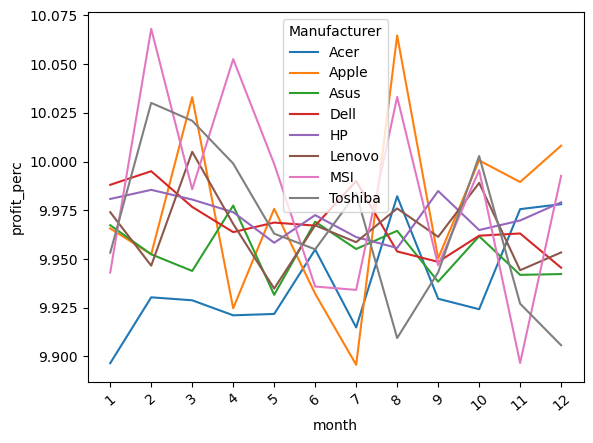

In [156]:
sns.lineplot(data=profit_monthly3, x="month", y="profit_perc", hue='Manufacturer')
plt.xticks(range(1,13,1), rotation=40)


برای نمایش بهتر، صرفا برای ۱۰ شرکت با فروش بیشتر نشان می‌دهیم. برندهای دیگر سهم خیلی کمی از بازار دارند

و در نهایت بررسی می‌کنیم میانگین ماهانه درصد سود هر برند در طی این بازه زمانی چگونه تغییر کرده است. آیا روند کلی تغییر سود برای برندها یکسان بوده است؟ میزان نوسانات کوتاه‌مدت سود هر برند چه طور؟

In [157]:
profit_monthly = all_data.groupby(['year','month','Manufacturer']).sum()[['Profit','Total_Price']].reset_index()
profit_monthly['profit_perc'] = profit_monthly['Profit']/profit_monthly['Total_Price']*100

In [158]:
profit_monthly.drop(columns=['Profit','Total_Price'],inplace=True)

In [159]:
profit_monthly['year'] = profit_monthly['year'].astype('str')
profit_monthly['month'] = profit_monthly['month'].astype('str')

profit_monthly['yearmonth'] = profit_monthly['year']+profit_monthly['month']

In [160]:
profit_monthly = profit_monthly.loc[(profit_monthly['Manufacturer']=='Dell') | (profit_monthly['Manufacturer']=='HP') | (profit_monthly['Manufacturer']=='Lenovo') | (profit_monthly['Manufacturer']=='Asus') | (profit_monthly['Manufacturer']=='Acer') | (profit_monthly['Manufacturer']=='Apple')]

([<matplotlib.axis.XTick at 0x12dbe27d0>,
 [Text(1, 0, '139012'),
  Text(6, 0, '13915'),
  Text(11, 0, '139110'),
  Text(16, 0, '13923'),
  Text(21, 0, '13928'),
  Text(26, 0, '13931'),
  Text(31, 0, '13936'),
  Text(36, 0, '139311'),
  Text(41, 0, '13944'),
  Text(46, 0, '13949'),
  Text(51, 0, '13952'),
  Text(56, 0, '13957'),
  Text(61, 0, '139512'),
  Text(66, 0, '13965'),
  Text(71, 0, '139610'),
  Text(76, 0, '13973'),
  Text(81, 0, '13978'),
  Text(86, 0, '13981'),
  Text(91, 0, '13986'),
  Text(96, 0, '139811'),
  Text(101, 0, '13994'),
  Text(106, 0, '13999'),
  Text(111, 0, '14002'),
  Text(116, 0, '14007'),
  Text(121, 0, '140012'),
  Text(126, 0, '14015'),
  Text(131, 0, '140110'),
  Text(136, 0, '14023'),
  Text(141, 0, '')])

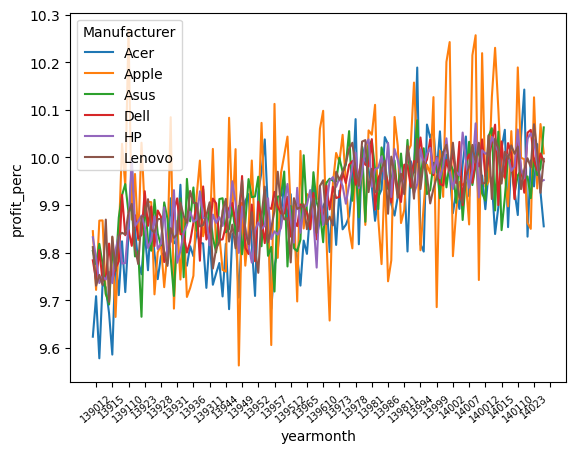

In [161]:
sns.lineplot(data=profit_monthly, x="yearmonth", y="profit_perc", hue='Manufacturer')
plt.xticks(range(1,145,5),rotation=40,fontsize=7)
#plt.xlim(50, 70)
#plt.locator_params(axis='x', nbins=30) 





همانطورر که مشخص است روند کلی صعودی مقدار درصد سود در برندها هم قابل مشاهده است اما آنچه جالب است تفاوت نوسان برندهای گوناگون است. برای مثال نوسان لپتاپ‌های اپل که با رنگ نارنجی مشخص شده بسیار زیاد است. این می‌تواند نشان‌گر وجود یه روند فصلی در عرضه و تقاضای اپل باشد. همچنین چون عموما لپتاپ‌های اپل قیمت‌های بالاتری داشته و مشتریان خاصی دارند، انتظار می‌رود، وقایع و نوسانات اثر شدیدتری روی قیمت خرید و فروش و در نتیجه سود آن بگذارد. در حالی که برای برند دل این نوسان بسیار اندک است. می‌دانیم که این برند پرفروش‌ترین برند در این بازه ۱۲ ساله بوده است و احتمالا عرضه تعداد زیاد و رقابتی آن در بازار و همچنین عدم وقفه در واردات آن باعث ثبات نسبی در میزان سود لوتک در این برند شده است.

حال نمودار بالا را در بازه ۵ سال گذشته محدود کرده و مجددا مشاهده می‌کنیم:

([<matplotlib.axis.XTick at 0x12db20410>,
 [Text(1, 0, '13972'),
  Text(3, 0, '13974'),
  Text(5, 0, '13976'),
  Text(7, 0, '13978'),
  Text(9, 0, '139710'),
  Text(11, 0, '139712'),
  Text(13, 0, '13982'),
  Text(15, 0, '13984'),
  Text(17, 0, '13986'),
  Text(19, 0, '13988'),
  Text(21, 0, '139810'),
  Text(23, 0, '139812'),
  Text(25, 0, '13992'),
  Text(27, 0, '13994'),
  Text(29, 0, '13996'),
  Text(31, 0, '13998'),
  Text(33, 0, '139910'),
  Text(35, 0, '139912'),
  Text(37, 0, '14002'),
  Text(39, 0, '14004'),
  Text(41, 0, '14006'),
  Text(43, 0, '14008'),
  Text(45, 0, '140010'),
  Text(47, 0, '140012'),
  Text(49, 0, '14012')])

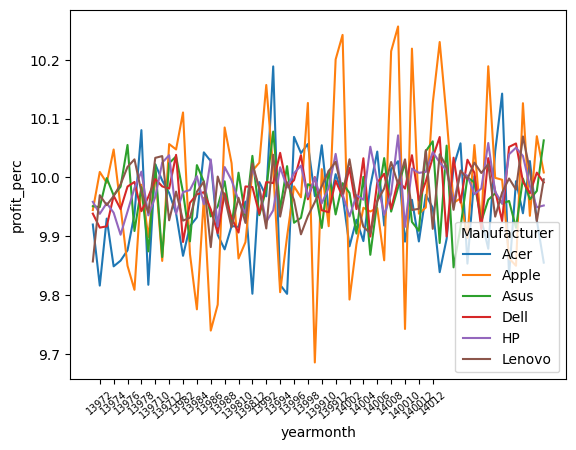

In [162]:
profit_monthly['year'] = profit_monthly['year'].astype('int')
profit_monthly = profit_monthly[profit_monthly['year']>1396]
sns.lineplot(data=profit_monthly, x="yearmonth", y="profit_perc", hue='Manufacturer')
plt.xticks(range(1,50,2),rotation=40,fontsize=7)